In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

\begin{equation*}

    \ddot{x} + c\dot{x} + kx=0

\end{equation*}

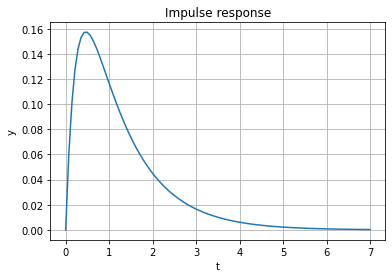

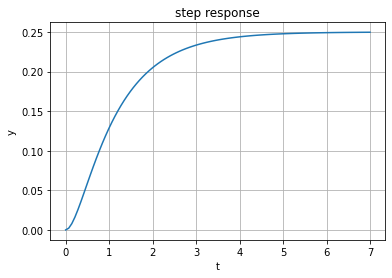

In [10]:
system = ([1.0], [1.0, 5.0, 4.0])

t, y = signal.impulse(system)
plt.plot(t, y)


plt.xlabel('t')
plt.ylabel('y')
plt.title('Impulse response')
plt.grid(True)
plt.show()

t, y = signal.step(system)
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.title('step response')
plt.grid(True)
plt.show()

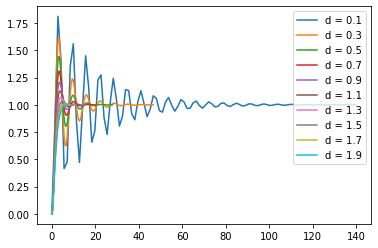

In [18]:
# changing damping ratio
k = 1

for d in np.arange(0.1, 2, 0.2):
    system = ([1.0], [1.0, d, k])
    t, y = signal.step(system)
    plt.plot(t, y, label='d = %.1f' % d)
    plt.legend()


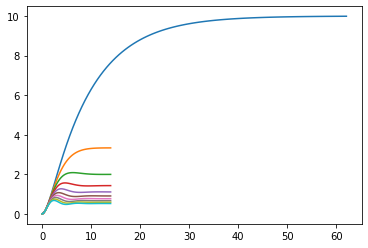

In [20]:
d = 1

for k in np.arange(0.1, 2, 0.2):
    system = ([1.0], [1.0, d, k])
    t, y = signal.step(system)
    plt.plot(t, y)